In [7]:
import pandas as pd
import numpy as np
%matplotlib inline

Import data, produce test and train splits, then fit the holt-winters model to the train set and evaluate forecasted values against testing set

In [8]:
passenger_data = pd.read_csv('/content/airline_passengers.csv', index_col='Month', parse_dates=True)

In [9]:
passenger_data.index.freq = 'MS'
passenger_data.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
passenger_data.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [11]:
train_data = passenger_data.iloc[:109]
test_data = passenger_data.iloc[108:]

In [12]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [13]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'], trend='mul',
                                    seasonal='mul', seasonal_periods=12).fit()

In [14]:
test_predictions = fitted_model.forecast(36)

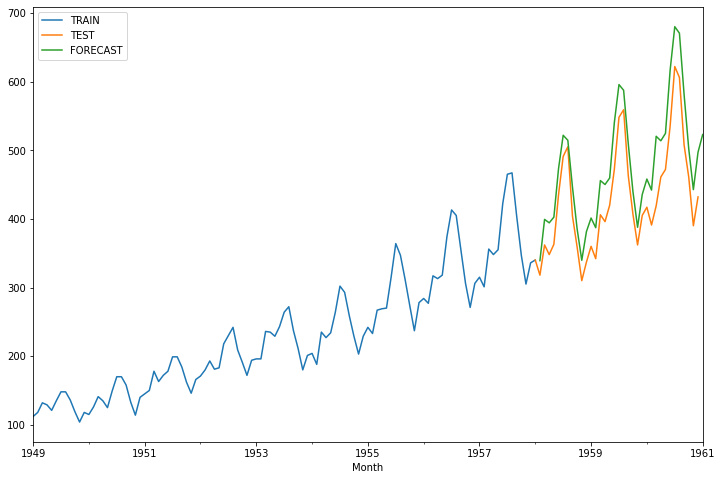

In [20]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12, 8))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')
test_predictions.plot(legend=True, label='FORECAST')

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [25]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


Compare error calculations to standard deviation to understand how well model fits to test set

In [26]:
np.sqrt(mean_squared_error(test_data, test_predictions))

74.92943823976594

In [23]:
mean_absolute_error(test_data, test_predictions)

63.03138491847624

Refit model on entire dataset for forecasting

In [28]:
final_model = ExponentialSmoothing(passenger_data['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

In [29]:
forecast_predictions = final_model.forecast(36)

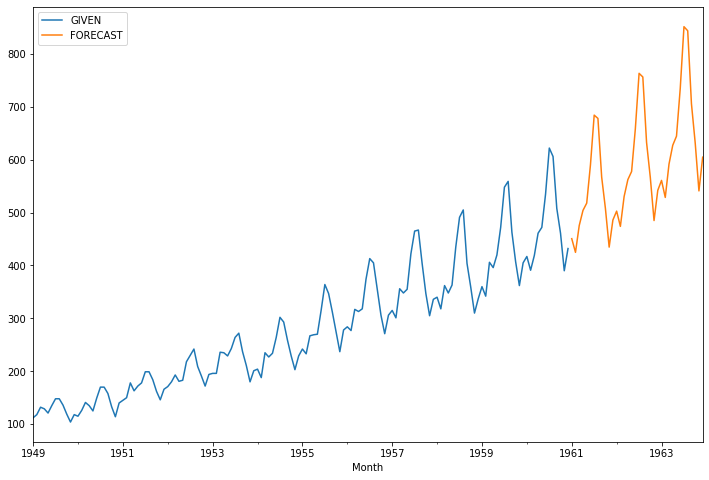

In [30]:
passenger_data['Thousands of Passengers'].plot(legend=True, label='GIVEN', figsize=(12, 8))
forecast_predictions.plot(legend=True, label='FORECAST', figsize=(12, 8))

Time series dataset is stationary if it does not exhibit trends or seasonality

In [31]:
samples_data = pd.read_csv('/content/samples.csv', index_col=0, parse_dates=True)

In [32]:
samples_data.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


No obvious trends or repetition; stationary dataset

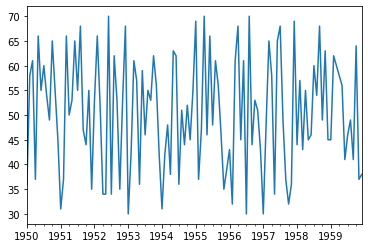

In [33]:
samples_data['a'].plot()

Obvious linear trend upwards, non-stationary dataset

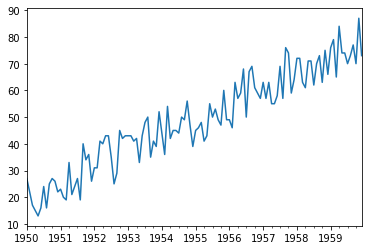

In [34]:
samples_data['b'].plot()

Apply differencing to make non-stationary data stationary by subtracting adjacent time steps

In [37]:
from statsmodels.tsa.statespace.tools import diff

Overview of differencing operation performed by shifting data points to subtract adjacent time steps. First-order difference; can perform n-th order difference. Each order of differencing corresponds to type of underlying trend removed meaning first-order difference for linear trend, second-order for quadratic trend, etc.

In [36]:
samples_data['b'] - samples_data['b'].shift(1)

1950-01-01     NaN
1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 120, dtype: float64

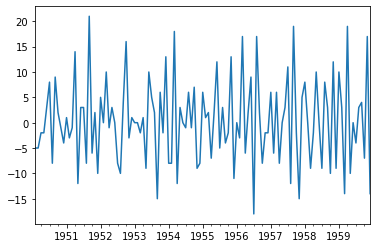

In [39]:
diff(samples_data['b'], k_diff=1).plot()